In [112]:
import os
import collections
import pandas as pd
import stylia
import matplotlib.pyplot as plt
from stylia.colors.colors import NamedColors

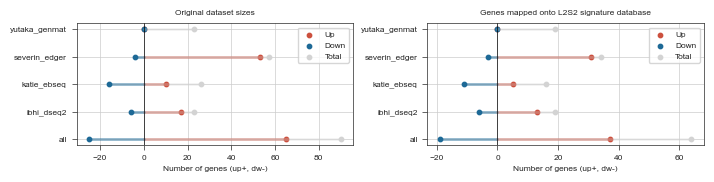

In [113]:
fig, axs = stylia.create_figure(1, 2, width=stylia.TWO_COLUMNS_WIDTH, height=stylia.TWO_COLUMNS_WIDTH/4)
ax = axs.next()

data = collections.defaultdict(dict)

for fn in os.listdir("../data/processed/01_updown/"):
    base_name = fn.split(".")[0]
    with open(f"../data/processed/01_updown/{fn}", "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if line.strip() != ""]
        if "_up" in base_name:
            data[base_name[:-3]]["up"] = set(lines)
        elif "_dw" in base_name:
            data[base_name[:-3]]["dw"] = set(lines)
        else:
            data[base_name]["tt"] = set(lines)

all_up = []
all_dw = []

for k,v in data.items():
    if "up" in v:
        all_up += list(v["up"])
    if "dw" in v:
        all_dw += list(v["dw"])
    
data["all"]["up"] = set(all_up)
data["all"]["dw"] = set(all_dw)

dataset_names = sorted(data.keys())

red = NamedColors().red
blue = NamedColors().blue
gray = NamedColors().gray

for i, name in enumerate(dataset_names):
    up = len(data[name].get("up", []))
    dw = len(data[name].get("dw", []))
    tt = len(data[name].get("tt", []))
    if tt == 0:
        tt = up + dw
    ax.scatter([up], [i], color=red, label="Up")
    ax.scatter([-dw], [i], color=blue, label="Down")
    ax.scatter([tt], [i], color=gray, label="Total")
    ax.plot([0, up], [i, i], color=red, lw=2, alpha=0.5)
    ax.plot([0, -dw], [i, i], color=blue, lw=2, alpha=0.5)
    ax.plot([0, tt], [i, i], color=gray, lw=2, alpha=0.3)
    
ax.axvline(0, color="black")
ax.legend(["Up", "Down", "Total"], loc="upper right")
ax.set_yticks(range(len(dataset_names)), dataset_names)
ax.set_ylabel("")
ax.set_xlabel("Number of genes (up+, dw-)")
ax.set_title("Original dataset sizes")

ax = axs.next()

data = collections.defaultdict(dict)

for fn in os.listdir("../data/processed/02_l2s2_queries/"):
    base_name = fn.split(".")[0]
    with open(f"../data/processed/02_l2s2_queries/{fn}", "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if line.strip() != ""]
        if "_up" in base_name:
            data[base_name[:-3]]["up"] = len(lines)
        elif "_dw" in base_name:
            data[base_name[:-3]]["dw"] = len(lines)
        else:
            data[base_name]["tt"] = len(lines)

dataset_names = sorted(data.keys())

red = NamedColors().red
blue = NamedColors().blue
gray = NamedColors().gray

for i, name in enumerate(dataset_names):
    up = data[name].get("up", 0)
    dw = data[name].get("dw", 0)
    tt = data[name].get("tt", 0)
    if tt == 0:
        tt = up + dw
    ax.scatter([up], [i], color=red, label="Up")
    ax.scatter([-dw], [i], color=blue, label="Down")
    ax.scatter([tt], [i], color=gray, label="Total")
    ax.plot([0, up], [i, i], color=red, lw=2, alpha=0.5)
    ax.plot([0, -dw], [i, i], color=blue, lw=2, alpha=0.5)
    ax.plot([0, tt], [i, i], color=gray, lw=2, alpha=0.3)
    
ax.axvline(0, color="black")
ax.legend(["Up", "Down", "Total"], loc="upper right")
ax.set_yticks(range(len(dataset_names)), dataset_names)
ax.set_ylabel("")
ax.set_xlabel("Number of genes (up+, dw-)")
ax.set_title("Genes mapped onto L2S2 signature database")

plt.tight_layout()

stylia.save_figure("../assets/04_updown_dataset_sizes.png")

In [114]:
# All data

all_genes = []
categories = []

for fn in os.listdir("../data/processed/02_l2s2_queries"):
    base_name = fn.split(".")[0]
    with open(f"../data/processed/02_l2s2_queries/{fn}", "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if line.strip() != ""]
        all_genes += lines
        categories += [base_name.replace("_up", "").replace("_dw", "")]

all_genes = sorted(set(all_genes))
categories = sorted(set(categories))
categories = [x+y for x in categories for y in ["_up", "_dw", "_tt"]]


In [144]:
data = {}

for category in categories:
    if not "_up" in category and not "_dw" in category:
        if "_tt" in category:
            category = category.replace("_tt", "")
        if os.path.exists(f"../data/processed/02_l2s2_queries/{category}.txt"):
            with open(f"../data/processed/02_l2s2_queries/{category}.txt", "r") as f:
                lines = f.readlines()
                lines = [line.strip() for line in lines if line.strip() != ""]
        else:
            lines = []
            with open(f"../data/processed/02_l2s2_queries/{category}_up.txt", "r") as f:
                up_lines = f.readlines()
                up_lines = [line.strip() for line in up_lines if line.strip() != ""]
                lines += up_lines
            with open(f"../data/processed/02_l2s2_queries/{category}_dw.txt", "r") as f:
                dw_lines = f.readlines()
                dw_lines = [line.strip() for line in dw_lines if line.strip() != ""]
                lines += dw_lines
    else:
        if not os.path.exists(f"../data/processed/02_l2s2_queries/{category}.txt"):
            lines = []
        else:
            with open(f"../data/processed/02_l2s2_queries/{category}.txt", "r") as f:
                lines = f.readlines()
                lines = [line.strip() for line in lines if line.strip() != ""]
    data[category] = set(lines)

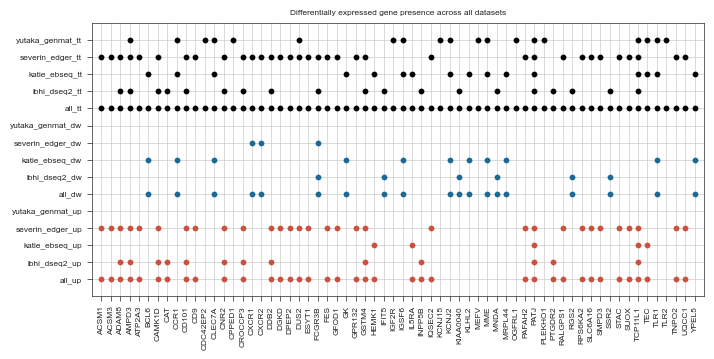

In [ ]:
fig, axs = stylia.create_figure(1, 1, width=stylia.TWO_COLUMNS_WIDTH, height=stylia.TWO_COLUMNS_WIDTH/2)

cats = sorted(set(["_".join(x.split("_")[:-1]) for x in categories]))
categories = []
for d in ["up", "dw", "tt"]:
    for cat in cats:
        categories += [f"{cat}_{d}"]

for category in categories:
    if category == "yutaka_genmat_tt":
        data[category] = data["yutaka_genmat"]
        del data["yutaka_genmat"]
    elif category == "all_tt":
        data[category] = data["all"]
        del data["all"]
    else:
        if category not in data:
            if "_tt" in category:
                cat = category.replace("_tt", "")
                tt = data[cat+"_up"].union(data[cat+"_dw"])
                data[category] = tt
            else:   
                print("ERROR!!! Missing category:", category)

ax = axs.next()
for i, category in enumerate(categories):
    if "_up" in category:
        color = red
    elif "_dw" in category:
        color = blue
    else:
        color = NamedColors().black
    gene_set = data[category]
    for gene in gene_set:
        gene_idx = all_genes.index(gene)
        if "all_" in category:
            ax.scatter([gene_idx], [i], color="white", edgecolor=color, s=10)
        else:
            ax.scatter([gene_idx], [i], color=color, s=10)

ax.set_yticks(range(len(categories)), categories)
ax.set_xticks(range(len(all_genes)), all_genes, rotation=90)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(-1, len(categories))
ax.set_xlim(-1, len(all_genes))
ax.set_title("Differentially expressed gene presence across all datasets")

stylia.save_figure("../assets/04_updown_all_datasets_matrix.png")